# **City of Pittsburgh:** An Investigation of Neighborhood Diversity

***

## **Introduction**

Pittsburgh is a city marked by its diversity. We as a group decided that we wanted our final analysis to reflect this element. Initially, we considered a standard approach to determining best, but how can one derive this from a city hallmarked by its uniqueness? Our city of steel is precisely endurable due to the fact that it has so much to offer. As a result, our analysis will focus upon investigating our best neighborhood in terms of its alignment with our city's spirit.

![home bound](https://media.giphy.com/media/cAzO4N3rHsXP1b8j4Z/giphy.gif)

***

## **The Metric**

Our metric is to measure the diversity of Pittsburgh neighborhoods. We will determine this by utilizing our various City of Pittsburgh datasets from the WPRDC inclusive of  steps, public art, and trees. Through each of our individual analyses, we will then determine which neighborhood is most prevalent amongst all of our datasets. 

**Aspects Include:**
  - Steps: Number of Steps and Length
  - Public Art: Number of Installations and Genre

***

## The Best Neighborhood: Steps

### Steps

In [5]:
import pandas as pd
staircases = pd.read_csv("CityOfPittsburghSteps.csv")
staircases.head(5)

,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,326501686,10 Wakefield St,3rd Division,NaN,Concrete,53.0,8.0,0.0,100.0,367.0,...,South Oakland,3.0,4.0,42003040900,3.0,4.0,4.0,2-11,40.430934,-79.957093
1,527853474,1005 St Martin St,4th Division,NaN,Concrete,33.0,24.0,NaN,NaN,NaN,...,South Side Slopes,3.0,17.0,42003170600,3.0,17.0,3.0,4-6,40.422418,-79.988218
2,1074700399,1017 St Martin St,4th Division,NaN,Concrete,52.0,4.0,NaN,NaN,NaN,...,South Side Slopes,3.0,17.0,42003170600,3.0,17.0,3.0,4-6,40.422479,-79.987608
3,50987987,30th St from Bigelow Blvd to Leander St,3rd Division,1948-01-01,Concrete,106.0,106.0,0.0,100.0,235.0,...,Bedford Dwellings,7.0,6.0,42003060500,3.0,6.0,2.0,2-24,40.454801,-79.968473
4,173445306,30th St from Paulowna to Bigelow Blvd,3rd Division,1948-01-01,Concrete,204.0,85.0,1.0,4.0,422.0,...,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6,40.455481,-79.968756


**Stairs dataset overview:**
we can see that both number of steps and step length align with diversity as they allow a measurement of differentation amongst the stairs of Pittsburgh! These elements will thus be incorporated within our analysis by defining a new dataframe in terms of these elements.

In [3]:
necessary = staircases[['neighborhood', 'length' , 'number_of_steps']]
cleaned_data = necessary.dropna()
summarized_data = cleaned_data.groupby(['neighborhood']).sum()
max_steps = summarized_data.nlargest( 20, ['number_of_steps'])
max_steps.head(10)

,length,number_of_steps
neighborhood,,
South Side Slopes,12632.0,4081.0
Beechview,9413.0,2473.0
Perry South,5609.0,1698.0
Greenfield,4345.0,1472.0
Hazelwood,4942.0,1374.0
Marshall-Shadeland,5260.0,1349.0
Mount Washington,5566.0,1316.0
Brookline,4769.0,1246.0
Fineview,3490.0,1174.0


**We will now...**
- Clean our data by dropping unneccesary columns
- Group by and sum submetrics according to neighborhoods
- Create a final dataframe for our steps metric with top 20 neighborhoods defined according to number of steps
- Plot our final dataframe for our steps metric

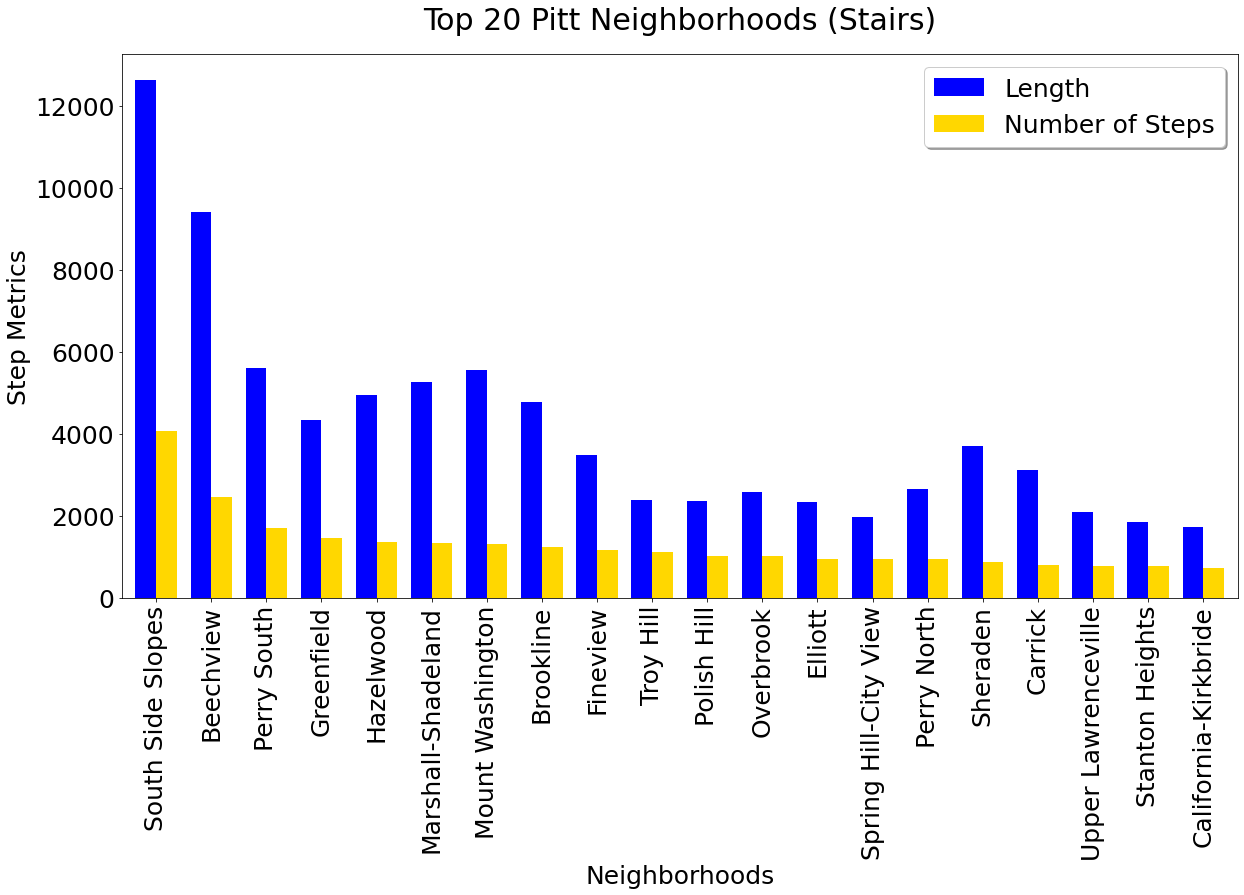

In [4]:
import matplotlib.pyplot as plt 
plotted = max_steps.plot.bar(  color = ['blue','gold'], width = .75, fontsize = 25, figsize =(20,10), legend = True, rot =90)
plt.xlabel(xlabel = 'Neighborhoods', fontsize = 25)
plt.ylabel(ylabel = 'Step Metrics', fontsize = 25)
plt.title(label = "Top 20 Pitt Neighborhoods (Stairs)",fontsize = 30, pad = 25)
plt.legend(['Length', 'Number of Steps'], fontsize =25,  shadow = True)
plt.show()

**Stairs Conclusion:** 
South Side Slopes, Beechview, Perry South, Greenfield and Hazelwood are the top 5 neighborhoods in the steps submetric

**And our Best Neighbohood Is..**

![home bound](https://media.giphy.com/media/5eFHMiyEKti7wkoAW0/giphy.gif)

***

## Conclusion

**Conclusion ( Madeleine Lasky ):** Overall, I found that the best neighborhood was not my dataset's number one choice in terms of my submetric. This was a surprise as I thought that my best neighborhood, South Side Slopes, would rank at least moderately well within my group member's submetrics. Ultimately, this was not the case and in fact, South Side Slopes ranked rather poorly from a universal perspective. 
***

# **Public Art**
## Health of the Mind
### Authored by Evan Fuccio

#### The second aspect that we use to determine the best neighborhood in Pittsburgh is not the smallest amount of police arrests, the least amount of pollutatants, nor even the least amount of those dreaded potholes who vie to pop your tires. Instead we chose to use our data analysis skills to find the neighborhood with the most public art. This is because we believe public art is critical in creating beautiful neighborhoods, and benefits the mental health of all residents in the area.

![public art](https://media.giphy.com/media/hv9ijJhFByQHIpUcjG/giphy.gif)

We found our data on public art installations in Pittsburgh at https://data.wprdc.org/dataset/city-of-pittsburgh-public-art
***

## Collecting Our Information
### First we must import the data on public art installations in Pittsburgh

In [3]:
import pandas as pd
art = pd.read_csv("public_art_data.csv")

### Next let us look at the top 5 columns to see what types of data we have for each entry

In [49]:
art.head(5)

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,19-Jan,40.429192,-80.066225
1,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,17-Jan,40.442926,-80.039711
2,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,4-Jan,40.438092,-79.996852
3,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,23-Apr,40.388748,-79.986497
4,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,26-Apr,40.391721,-80.016981


***
## Art Quantity Analysis

#### For our analysis we are going to look at the neighborhood in which each art installation is located, and the genre of art piece in order to determine our final decision about the best neighborhood in Pittsburgh

### Let us first look at all the different neighborhoods in the dataset

In [45]:
#This commands returns all the unique values in the neighborhood column in our dataset, thus it presents all the neighborhoods in the dataset

art['neighborhood'].unique()

array(['Oakwood', 'Elliott', 'Central Business District', 'Carrick',
       'Brookline', 'South Side Slopes', nan, 'Hazelwood',
       'Highland Park', 'Squirrel Hill South', 'Perry North',
       'Beltzhoover', 'Spring Hill-City View', 'West End', 'Greenfield',
       'Shadyside', 'East Allegheny', 'Squirrel Hill North', 'Beechview',
       'Crawford-Roberts', 'Lincoln-Lemington-Belmar', 'Hays',
       'Allegheny Center', 'North Oakland', 'South Side Flats',
       'Central Oakland', 'Point Breeze', 'Allegheny West',
       'Strip District', 'Mount Washington', 'Brighton Heights',
       'Perry South', 'North Shore', 'Upper Hill', 'Garfield',
       'Central Lawrenceville', 'Upper Lawrenceville', 'Stanton Heights',
       'Duquesne Heights', 'Allentown', 'East Liberty', 'Bloomfield',
       'East Carnegie', 'East Hills', 'Lower Lawrenceville', 'Overbrook',
       'Polish Hill', 'Regent Square', 'Sheraden', 'Spring Garden',
       'Swisshelm Park', 'Troy Hill', 'Crafton Heights', 'Espl

### Now let us look at the amount of art located in each Neighborhood!

In [9]:
print("Neighborhood          Art Count")
art['neighborhood'].value_counts()

Neighborhood          Art Count


Central Business District    27
Squirrel Hill South          20
Allegheny Center             18
Highland Park                10
South Side Flats              9
North Shore                   8
Beechview                     7
Shadyside                     6
Central Oakland               5
Lower Lawrenceville           5
Brighton Heights              5
Spring Hill-City View         4
Crawford-Roberts              3
South Side Slopes             3
Duquesne Heights              3
Elliott                       3
Greenfield                    3
Beltzhoover                   3
Point Breeze                  3
Hazelwood                     3
Allentown                     2
Perry North                   2
Garfield                      2
West End                      2
Strip District                2
Carrick                       2
East Allegheny                2
Mount Washington              2
Lincoln-Lemington-Belmar      2
Spring Garden                 2
Central Lawrenceville         2
Squirrel

### As we can see from the list, the Central Business District has the most public art installations of any neighborhood

#### Let's view those statistics again but with a bar graph.

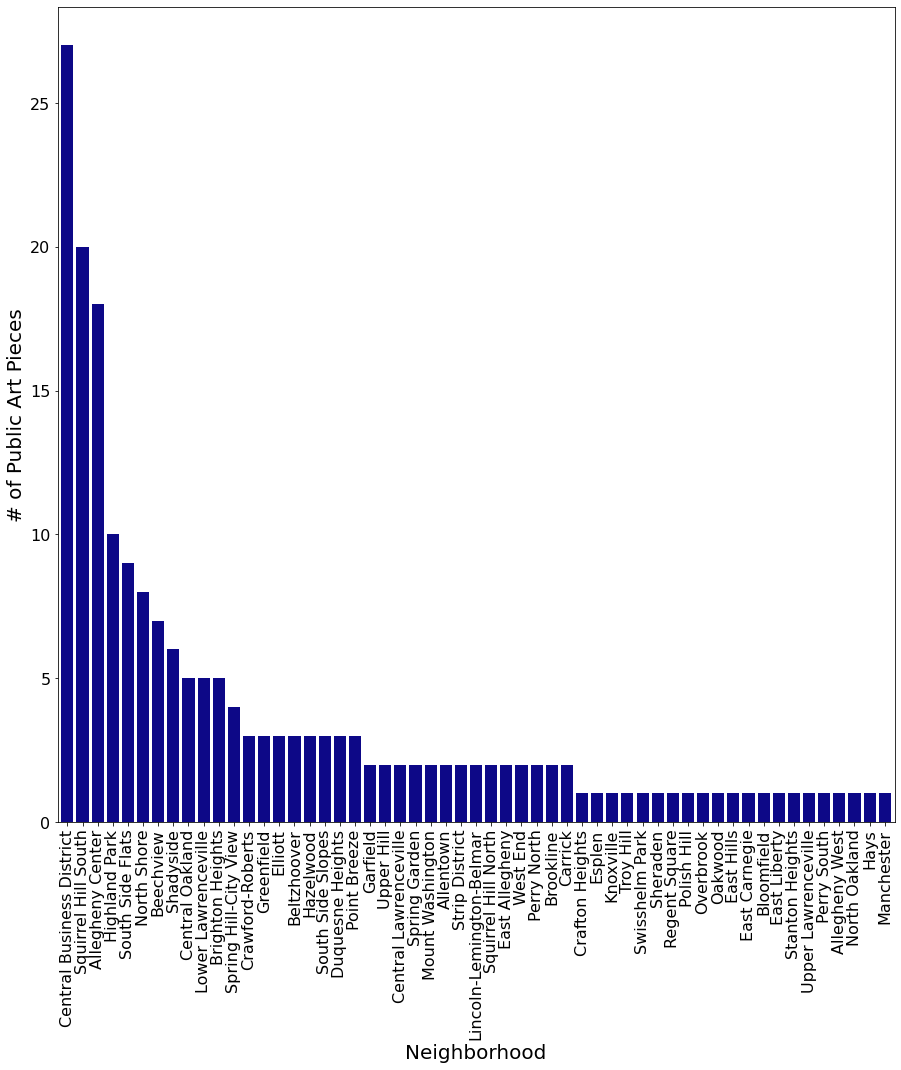

In [61]:
import matplotlib.pyplot as plt
import numpy as np

#gets the values for each neighborhood
neighborhood_data = art['neighborhood'].value_counts()

#formatting the bar graph
plt.rc('font', size=16)
plt.xlabel('Neighborhood', size = 20)
plt.ylabel('# of Public Art Pieces', size = 20)
neighborhood_data.plot(kind='bar', width=0.8, align='center', figsize=(15,15), cmap='plasma')
plt.show()

#### As we can see, the neighborhood with the most public art installations is the Central Business District with 27 installations followed by Squirrel Hill South with 20.

***
## Analysis by Art Genre

### Next let's look at the distribution of public art installations in Pittsburgh based on the genre of the piece.

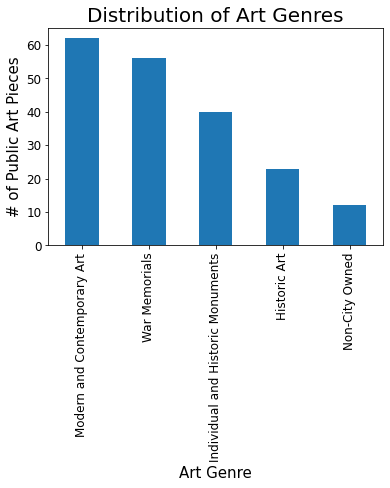

In [30]:
import matplotlib.pyplot as plt
art_types = art['art_type'].value_counts()
plt.rc('font', size=12)
plt.title('Distribution of Art Genres', size= 20)
plt.xlabel('Art Genre', size = 15)
plt.ylabel('# of Public Art Pieces', size = 15)
art_types.plot(kind='bar')

#### As we can see, Modern and Contemporary Art pieces are the most popular in Pittsburgh followed by War Memorials, Individual and Historic Monuments, Historic Art and finally Non-City Owned art
***

## Anaylzing Art Genre in the Top 3 Neighborhoods
### Let us look at the top 3 neighborhoods for public art quantity in Pittsburgh and see if the dominant genres of art differ between the three neighborhoods.

### #1 Central Business District

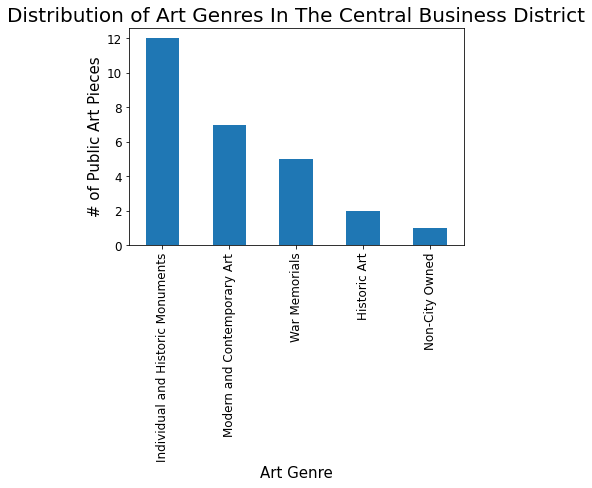

In [46]:
central_filter = art[art['neighborhood'] == 'Central Business District']
art_in_central = central_filter['art_type'].value_counts()
plt.title('Distribution of Art Genres In The Central Business District', size= 20)
plt.xlabel('Art Genre', size = 15)
plt.ylabel('# of Public Art Pieces', size = 15)
art_in_central.plot(kind='bar')

#### As you can see from the bar graph, the dominant art genre present in the Central Business District is Individual and Historic Monuments
### #2 Squirrel Hill South

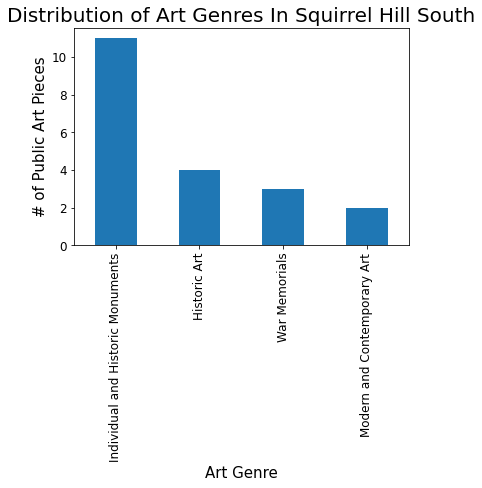

In [47]:
squirrel_hill_filter = art[art['neighborhood'] == 'Squirrel Hill South']
art_in_central = squirrel_hill_filter['art_type'].value_counts()
plt.title('Distribution of Art Genres In Squirrel Hill South', size= 20)
plt.xlabel('Art Genre', size = 15)
plt.ylabel('# of Public Art Pieces', size = 15)
art_in_central.plot(kind='bar')

#### As you can see, Squirrel Hill South continues the trend of the most popular genre of art being Individual and Historic Monuments
### #3 Allegheny Center

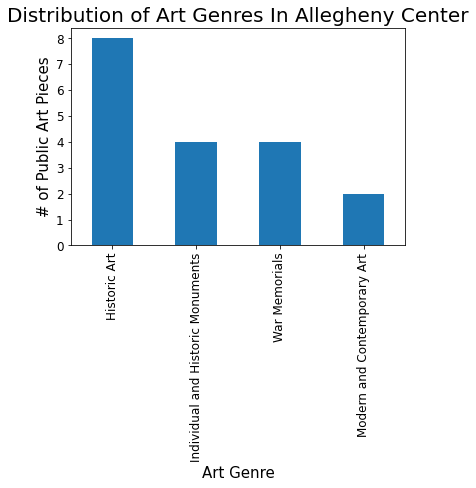

In [48]:
allegheny_center_filter = art[art['neighborhood'] == 'Allegheny Center']
art_in_central = allegheny_center_filter['art_type'].value_counts()
plt.title('Distribution of Art Genres In Allegheny Center', size= 20)
plt.xlabel('Art Genre', size = 15)
plt.ylabel('# of Public Art Pieces', size = 15)
art_in_central.plot(kind='bar')

#### Finally, Allegheny Center breaks this trend by having Historic Art be the most popular art genre in the neighbhorhood. This difference in art genre may influence someone's decision on what neighborhood is the best depending on their art preferences.
***
## Conclusion for Public Art Installations
### Based on its quantity of public art installations, the Central Business District in Pittsburgh is the most desirable neighborhood to live in. If the person cares about the genre of the public art, they may prefer Allegheny Center if they like Historic art more than the popular genre of Individual and Historic Monuments present in the Central Business District.
***

# Trees

## Health of the lungs
Having many trees in your neighborhood is a sign of beauty, good health and happiness. Trees are essential to any ecosystem. Using the data that we've aquired, we will find out which neighborhoods benefit the most from their trees.

In [1]:
import pandas as pd
trees = pd.read_csv("trees.csv")

<ipython-input-1-d67f620725fe>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  trees = pd.read_csv("trees.csv")


## Here's what it'll look like

In [4]:
trees.sample(5)

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
12494,1545542670,800.0,EAST END AVE,Maple: Norway,Acer platanoides,40.0,7.0,99.0,2.0,Tree Lawn or Parkway,...,Regent Square,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-16,40.437048,-79.895529
20675,1791784760,5911.0,HOBART ST,Chokecherry: Common,Prunus virginiana,14.0,7.0,10.0,2.0,Tree Lawn or Parkway,...,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-21,40.434271,-79.919624
26132,408825475,3701.0,S WATER ST,Oak: Northern Red,Quercus rubra,17.0,7.0,99.0,8.0,Open or Restricted,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.422717,-79.956918
22425,529748861,1401.0,BROWNSVILLE RD,Crabapple: Flowering,Malus spp.,15.0,7.0,99.0,3.0,Tree Lawn or Parkway,...,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-12,40.400950,-79.989302
22023,1690435936,630.0,BELLEFONTE ST,Pear: Callery,Pyrus calleryana,17.0,7.0,3.0,3.0,Well or Pit,...,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-22,40.452582,-79.934715


## Neighborhoods listed in the dataset

In [5]:
trees['neighborhood'].unique()

array(['Homewood North', 'Oakwood', 'South Side Flats', 'East Allegheny',
       'Highland Park', 'Stanton Heights', 'Sheraden', 'Chartiers City',
       'Elliott', 'Morningside', 'Bloomfield', 'Friendship', 'Garfield',
       'Polish Hill', 'Lower Lawrenceville', 'Central Northside',
       'East Liberty', 'Central Lawrenceville', 'Shadyside',
       'Allegheny Center', 'Homewood South', 'Point Breeze North',
       'East Hills', 'Homewood West', 'Greenfield', 'Hazelwood',
       'Squirrel Hill South', 'Marshall-Shadeland', 'Brighton Heights',
       'North Shore', 'Overbrook', 'Knoxville', 'Brookline',
       'South Side Slopes', 'Arlington', 'Arlington Heights', 'Carrick',
       'Bedford Dwellings', 'Central Business District', 'Bluff',
       'West Oakland', 'South Oakland', 'Squirrel Hill North',
       'Point Breeze', 'Lincoln-Lemington-Belmar', 'Bon Air',
       'Mount Washington', 'California-Kirkbride', 'New Homestead',
       'Central Oakland', 'Crafton Heights', 'Beechview'

## It even lists the different types of trees!

In [6]:
trees['common_name'].unique()

array(['Stump', 'Linden: Littleleaf', 'Maple: Red', 'Maple: Freeman',
       'Maple: Norway', 'Oak: Pin', 'Dogwood: Corneliancherry',
       'Honeylocust: Thornless', 'Oak: Northern Red',
       'Sweetgum: American', 'Ginkgo', 'Locust: Black', 'Cherry: Black',
       'London planetree', 'Horsechestnut', 'Catalpa: Northern',
       'Elm: American', 'Oak: Sawtooth', 'Serviceberry: Downy',
       'Hornbeam: European', 'Lilac: Japanese Tree',
       'Baldcypress: Common', 'Maple: Amur', 'Linden: Silver',
       'Oak: Swamp White', 'Pear: Callery', 'Crabapple: Flowering',
       'Maple: Hedge', 'Maple: Miyabei', 'Maple: Paperbark',
       'Hawthorn: spp.', 'Zelkova: Japanese', 'Cherry/Plum: spp.',
       'Redbud: Eastern', 'Hackberry: Common', 'Serviceberry: Eastern',
       'Dogwood: Kousa', 'Maple: spp.', 'Maple: Tatarian', 'Elm: spp.',
       'Spruce: Colorado', 'Spruce: Norway', 'Mulberry: White',
       'Maple: Silver', 'Serviceberry: Smooth', 'Arborvitae: Eastern',
       'Tuliptree',

## Here are the top 10 neighborhoods with the most trees

In [7]:
print("Neighborhood                Trees")
trees['neighborhood'].value_counts().head(10)

Neighborhood                Trees


Squirrel Hill South          5073
Highland Park                2941
Squirrel Hill North          2083
South Side Flats             1693
Shadyside                    1558
Bloomfield                   1436
East Liberty                 1366
Point Breeze                 1316
Perry North                  1007
Central Business District    1002
Name: neighborhood, dtype: int64

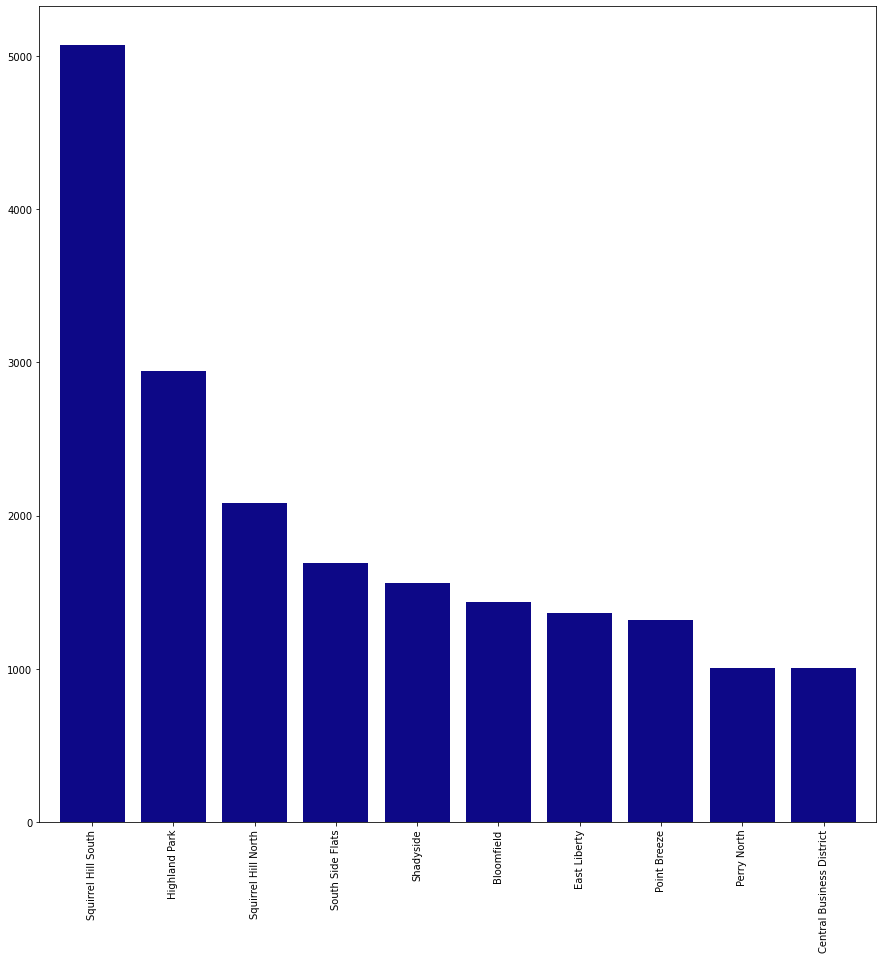

In [8]:
trees['neighborhood'].value_counts().head(10).plot(kind='bar', width=0.8, align='center', figsize=(15,15), cmap='plasma')

In [2]:
import math
d = {}
for index, row in trees.iterrows():
    if row['neighborhood'] in d.keys():
        if math.isnan(row['property_value_benefits_dollarvalue']) == False:
            d[row['neighborhood']] += row['property_value_benefits_dollarvalue']
    else:
        if math.isnan(row['property_value_benefits_dollarvalue']) == False:
            d[row['neighborhood']] = row['property_value_benefits_dollarvalue']
        
print(d)

{'Oakwood': 4241.806053176863, 'South Side Flats': 67263.96929603667, 'East Allegheny': 17539.848708590813, 'Highland Park': 162721.29348721742, 'Sheraden': 13600.32316204017, 'Chartiers City': 1679.8600321367053, 'Elliott': 6914.383245632302, 'Stanton Heights': 42892.07276280259, 'Morningside': 16382.20654874849, 'Bloomfield': 57972.65867711192, 'Friendship': 12482.754537828056, 'Garfield': 28141.194616009885, 'Polish Hill': 8648.95906823373, 'Lower Lawrenceville': 23857.918025637475, 'Central Northside': 28539.45063327815, 'East Liberty': 53386.019590411735, 'Central Lawrenceville': 23887.06839059347, 'Shadyside': 75042.75321652676, 'Allegheny Center': 57963.12600066445, 'Homewood South': 15106.705934652457, 'Homewood North': 14421.148051155678, 'Point Breeze North': 23710.877049879135, 'East Hills': 24808.560318597403, 'Homewood West': 3898.87630479379, 'Greenfield': 28510.616513886856, 'Hazelwood': 26991.782650084497, 'Squirrel Hill South': 286319.3423107425, 'Marshall-Shadeland': 

## Here are the top 10 neghiborhoods with the most property value gains

In [3]:
from operator import itemgetter
newd = dict(sorted(d.items(), key = itemgetter(1), reverse = True)[:10])
for key in newd:
    print(key + ': ' + str(newd[key]))
    print()

Squirrel Hill South: 286319.3423107425

Highland Park: 162721.29348721742

Squirrel Hill North: 118348.74252427471

Shadyside: 75042.75321652676

South Side Flats: 67263.96929603667

Point Breeze: 66381.1960658057

Bloomfield: 57972.65867711192

Allegheny Center: 57963.12600066445

Perry North: 56286.033724284905

Central Business District: 53902.80625156629



## Top 10 overall neighborhoods
Judged by adding up all the numbers in the tree count and property value benefits dictionary

In [9]:
for index, row in trees.iterrows():
    if row['neighborhood'] in d.keys():
        d[row['neighborhood']] += 1
        
total = dict(sorted(d.items(), key = itemgetter(1), reverse = True)[:10])
for key in total:
    print(key + ': ' + str(total[key]))
    print()

Squirrel Hill South: 291392.3423107425

Highland Park: 165662.29348721742

Squirrel Hill North: 120431.74252427471

Shadyside: 76600.75321652676

South Side Flats: 68956.96929603667

Point Breeze: 67697.1960658057

Bloomfield: 59408.65867711192

Allegheny Center: 58830.12600066445

Perry North: 57293.033724284905

Central Business District: 54904.80625156629



## Winner: Squirrel Hill South
Due to it having the most trees and the biggest property value benefits from its trees, Squirrel Hill South is the best neighborhood in Pittsburgh according to the tree metric

# Final Conclusion
### In order to combine all metrics analyzed in our three datasets we each ranked the datasets with 1 being the top neighborhood, 2 being the second top neighborhood and so forth. We then combined our rankings on an excel document to find the neighborhood with the lowest total score. By scoring the neighborhoods we came to two conclusions. Although Squirrel Hill South had the lowest score, scoring 1st for trees and 2nd for public art installations, it ranked extremely low at 46th for its number of steps ranking. Because of this, we decided to conclude that Brookline is actually the best neighborhood overall for all three of the metrics because it scored within the top 15 for all metrics: 8th for steps, 12th for art, and 12th for public art. 